In [1]:
import pandas as pd
import glob
import os
import re
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import altair as alt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import nltk
nltk.download('stopwords') 
from sklearn.decomposition import PCA
from nltk.corpus import stopwords
from sklearn.tree import DecisionTreeClassifier, plot_tree # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics 
from scipy.sparse import hstack 
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV




[nltk_data] Downloading package stopwords to
[nltk_data]     /home/Antonio/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
def extrair_searchword(nome_arquivo):
    match = re.search(r"SEARCHWORD(\d+)", nome_arquivo)
    return int(match.group(1)) if match else float('inf')


In [3]:
df = pd.read_csv('df_risco_conc.csv')

In [4]:
df['Palavra_Chave'].unique()

array(['insect', 'Hipoalergenico', 'Petisco Natural Cães', 'mordedor',
       'inseto', 'petisco Super Premium', 'Gastro',
       'Bifinho Super Premium', 'suplemento animal', 'Bifinho Natural',
       'Petisco calmante', 'petisco suplementoso', 'Petisco natural',
       'Petisco hipoalergenico', 'Alimentação natural fresca', 'Bifinho'],
      dtype=object)

In [5]:
df_bif = df[df['Palavra_Chave'].isin(['Bifinho', 'Bifinho Natural', 'Bifinho Super Premium'])]

In [6]:
df_bif = df_bif[df_bif['Qtde_Aval'] != 0]

In [7]:
df_bif[['Risco_Concorrencia_Predito', 'Nota_Produto', 'Qtde_Aval']].value_counts()

Risco_Concorrencia_Predito  Nota_Produto  Qtde_Aval
Risco Alto                  5.0           1            7
Risco Baixo                 5.0           1            5
Risco Médio                 5.0           1            3
                                          4            2
                                          2            2
Risco Alto                  4.5           2            2
Risco Médio                 4.8           15           2
                            4.6           25           2
                                          11           2
Risco Baixo                 5.0           3            2
                            4.8           6            1
                            4.7           16           1
                            4.8           4            1
                            5.0           4            1
                            4.8           16           1
                            4.3           7            1
                            4.6     

In [8]:
df_bif[['Marca_Produto', 'Risco_Concorrencia_Predito']].value_counts()

Marca_Produto   Risco_Concorrencia_Predito
spin            Risco Alto                    14
xisdog          Risco Baixo                    9
nutrilus-pro    Risco Baixo                    8
mister-maskoto  Risco Médio                    7
petvegan        Risco Médio                    6
baw-waw         Risco Baixo                    3
oh-lala-pet     Risco Alto                     3
mastig          Risco Alto                     2
Name: count, dtype: int64

In [9]:
df_bif = df_bif[~df_bif['Nome_Produto'].str.contains('Gatos')]

In [10]:
df_bif  = df_bif[~df_bif['Nome_Produto'].str.contains('Ração')]

In [11]:
df_bif[['Marca_Produto', 'Risco_Concorrencia_Predito']].value_counts()

Marca_Produto   Risco_Concorrencia_Predito
spin            Risco Alto                    10
xisdog          Risco Baixo                    9
mister-maskoto  Risco Médio                    7
nutrilus-pro    Risco Baixo                    7
petvegan        Risco Médio                    6
baw-waw         Risco Baixo                    3
oh-lala-pet     Risco Alto                     3
Name: count, dtype: int64

In [12]:
df_bif[df_bif['Marca_Produto'] == 'petvegan']['Nome_Produto']

408    Bifinho PetVegan para Cães Sabor Camomila e Ma...
409    Bifinho PetVegan para Cães Sabor Mamão, laranj...
410    Bifinho PetVegan para Cães Sabor Beterraba e C...
569    Bifinho PetVegan para Cães Sabor Camomila e Ma...
572    Bifinho PetVegan para Cães Sabor Mamão, laranj...
573    Bifinho PetVegan para Cães Sabor Beterraba e C...
Name: Nome_Produto, dtype: object

In [13]:
diretorio = Path("PetLove")
cmmt_files = list(diretorio.glob("ComentariosPetlove*"))


arquivos_ordenados = sorted(cmmt_files, key=lambda x:extrair_searchword(str(x)))

dfs = [pd.read_csv(arquivo) for arquivo in arquivos_ordenados]
df_cmmt = pd.concat (dfs, ignore_index=True)

/tmp/ipykernel_3584183/3258605205.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_cmmt = pd.concat (dfs, ignore_index=True)


In [14]:
df_cmmt.columns

Index(['Unnamed: 0', 'Título', 'Nota_Avaliação', 'Nome_Comentario',
       'Comentários', 'Data_Comentario', 'Marca', 'Produto', 'Link',
       'Palavra_Chave'],
      dtype='object')

In [15]:
df_bif['Marca_Produto'].unique()

array(['mister-maskoto', 'petvegan', 'nutrilus-pro', 'xisdog', 'spin',
       'baw-waw', 'oh-lala-pet'], dtype=object)

In [16]:
df_cmmt_conc = df_cmmt[df_cmmt['Produto'].isin(df_bif['Nome_Produto'])]

In [17]:
df_cmmt_conc

Unnamed: 0                     Título  Nota_Avaliação Nome_Comentario  \
472812         890       Petisco sensassional             5.0           Jader   
472813         891             Meu filho amou             5.0         Sabrina   
472814         892                        Bom             5.0            Igor   
472815         893              Ótimo produto             5.0        Dionatan   
472816         894                  Ressecado             2.0          Renata   
...            ...                        ...             ...             ...   
1896740       3359                        Bom             5.0          Bianca   
1896741       3360       Nossa cachorra amou!             5.0            Joao   
1896742       3361            Super aprovado!             5.0         Juliana   
1896743       3362    Não compraria novamente             1.0      Elessandra   
1896744       3363  Aprovado pelo veterinário             5.0            Taty   

                                               Comentários    Data_Comentario  \
472812   Meus cães adoraram, tem um bom cheiro, e um ot...   10/02/2023 22:44   
472813   Macio, o cheiro é tão bom que dá até vontade d...   08/11/2022 00:22   
472814                                                 Bom   20/10/2022 17:11   
472815                                       Ótimo produto   31/05/2022 09:00   
472816   Ressecado e duro, pouco atrativo, já comprei m...   20/02/2022 11:37   
...                                                    ...                ...   
1896740                              Minha cachorra adorou   18/03/2022 20:51   
1896741  Natural, tamanho perfeito, ótima embalagem e o...   26/01/2022 22:25   
1896742  Minha filha de 4 patas é super seletiva e ador...   14/12/2021 22:05   
1896743  Cachorro comeu mostra interesse mas alimento p...   27/11/2021 11:56   
1896744                                         Excelente!   16/10/2021 12:18   

                  Marca                                            Produto  \
472812   mister-maskoto   Bifinho Maskoto para Cães Sabor Frango e Cenoura   
472813   mister-maskoto   Bifinho Maskoto para Cães Sabor Frango e Cenoura   
472814   mister-maskoto   Bifinho Maskoto para Cães Sabor Frango e Cenoura   
472815   mister-maskoto   Bifinho Maskoto para Cães Sabor Frango e Cenoura   
472816   mister-maskoto   Bifinho Maskoto para Cães Sabor Frango e Cenoura   
...                 ...                                                ...   
1896740        petvegan  Bifinho PetVegan para Cães Sabor Beterraba e C...   
1896741        petvegan  Bifinho PetVegan para Cães Sabor Beterraba e C...   
1896742        petvegan  Bifinho PetVegan para Cães Sabor Beterraba e C...   
1896743        petvegan  Bifinho PetVegan para Cães Sabor Beterraba e C...   
1896744        petvegan  Bifinho PetVegan para Cães Sabor Beterraba e C...   

                                                      Link  \
472812   https://www.petlove.com.br/bifinho-maskoto-fra...   
472813   https://www.petlove.com.br/bifinho-maskoto-fra...   
472814   https://www.petlove.com.br/bifinho-maskoto-fra...   
472815   https://www.petlove.com.br/bifinho-maskoto-fra...   
472816   https://www.petlove.com.br/bifinho-maskoto-fra...   
...                                                    ...   
1896740  https://www.petlove.com.br/bifinho-petvegan-ve...   
1896741  https://www.petlove.com.br/bifinho-petvegan-ve...   
1896742  https://www.petlove.com.br/bifinho-petvegan-ve...   
1896743  https://www.petlove.com.br/bifinho-petvegan-ve...   
1896744  https://www.petlove.com.br/bifinho-petvegan-ve...   

                 Palavra_Chave  
472812   Bifinho Super Premium  
472813   Bifinho Super Premium  
472814   Bifinho Super Premium  
472815   Bifinho Super Premium  
472816   Bifinho Super Premium  
...                        ...  
1896740        Bifinho Natural  
1896741        Bifinho Natural  
1896742        Bifinho Natural  
1896743        Bifinho Natural  
1896744        Bi

In [18]:
df_bif.columns

Index(['Unnamed: 0', 'Nome_Produto', 'Marca_Produto', 'Nota_Produto',
       'Resumo_Descrição', 'Preço', 'Tamanho', 'Qtde_Aval', 'Qtde_Resp',
       'Link', 'Palavra_Chave', 'Risco_Concorrencia',
       'Risco_Concorrencia_Predito'],
      dtype='object')

In [19]:
df_cmmt_conc.rename(columns={'Produto' : 'Nome_Produto'}, inplace=True)

/tmp/ipykernel_3584183/883682915.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cmmt_conc.rename(columns={'Produto' : 'Nome_Produto'}, inplace=True)


In [20]:
df_cmmt_conc.columns

Index(['Unnamed: 0', 'Título', 'Nota_Avaliação', 'Nome_Comentario',
       'Comentários', 'Data_Comentario', 'Marca', 'Nome_Produto', 'Link',
       'Palavra_Chave'],
      dtype='object')

In [21]:
len(df_cmmt_conc['Comentários'].unique())

1263

In [22]:
df_cmmt_conc = df_cmmt_conc.merge(df_bif[['Nome_Produto', 'Risco_Concorrencia_Predito']], on='Nome_Produto', how='inner')

In [23]:
df_cmmt_conc = df_cmmt_conc[df_cmmt_conc['Palavra_Chave'].isin(df_bif['Palavra_Chave'])]

In [24]:
df_nomes = pd.read_csv("Nomes/nomes.csv")

In [25]:
df_nomes = df_nomes.fillna(0)

In [26]:
df_nomes

alternative_names classification  \
0       AILINE|ALEINE|ALIINE|ALINE|ALINER|ALINHE|ALINN...              F   
1                                              ARAAO|ARAO              M   
2                            AHARON|AROM|ARON|ARYON|HARON              M   
3                                 ADA|ADAH|ADAR|ADHA|HADA              F   
4                                                       0              M   
...                                                   ...            ...   
100782                                           MACILEIA              F   
100783  GELINE|GILEINE|GLEINE|GLEINER|GLEYNE|JAELINE|J...              F   
100784                                  DEMILTOM|DEMILTON              M   
100785  ALIVIA|ELIVIA|EULIVIA|HOLIVIA|LEIVIA|LIIVIA|LI...              F   
100786                                             FABSON              M   

       first_name  frequency_female  frequency_male  frequency_total  \
0          AALINE              66.0             0.0               66   
1           AARAO               0.0           281.0              281   
2           AARON               0.0           676.0              676   
3             ABA              82.0             0.0               82   
4           ABADE               0.0            57.0               57   
...           ...               ...             ...              ...   
100782    MACLEIA              43.0             0.0               43   
100783    GIULINE              24.0             0.0               24   
100784  DEMAILTON               0.0            24.0               24   
100785     ILIVIA              22.0             0.0               22   
100786     FADSON               0.0            26.0               26   

        frequency_group group_name  ratio  
0                530550      ALINE    1.0  
1                  3526       ARAO    1.0  
2                  3442       ARON    1.0  
3                  5583        ADA    1.0  
4                    57      ABADE    1.0  
...                 ...        ...    ...  
100782              457   MACILEIA    1.0  
100783             2869     JALINE    1.0  
100784              631   DEMILTON    1.0  
100785           179561      LIVIA    1.0  
100786              247     FABSON    1.0  

[100787 rows x 9 columns]

Possibilidades:

    - Posso treinar um modelo de Arvore ou Regressão logistica para assumir o genero (resposta certa e longa)
    - ou fazer um merge com os nomes e pegar o genero, quem nao parace no DataSet fica como indefinido (Resposta curta) 


In [27]:
df_cmmt_conc.rename(columns={'Nome_Comentario' : 'Nomes'}, inplace=True)

In [28]:
df_nomes.rename(columns={'first_name' : 'Nomes'}, inplace=True)

In [29]:
df_nomes['Nomes'] = df_nomes['Nomes'].str.capitalize()

In [30]:
df_cmmt_conc = df_cmmt_conc.merge(df_nomes[['classification', 'Nomes']], on='Nomes', how='left')

In [31]:
df_cmmt_conc['Comentários'] = df_cmmt_conc['Comentários'].fillna("Nenhum comentário redigido")

In [32]:
len(df_cmmt_conc) 

63368

In [33]:
df_cmmt_conc['classification'].fillna("Indefinido")

0        M
1        M
2        F
3        F
4        M
        ..
63363    F
63364    F
63365    F
63366    F
63367    F
Name: classification, Length: 63368, dtype: object

In [34]:
df_cmmt_conc['classification'].value_counts(normalize=True)

classification
F    0.858163
M    0.141837
Name: proportion, dtype: float64

In [35]:
df_cmmt_conc.rename(columns={'classification': 'Gênero'}, inplace=True)

In [36]:
label_col = df_cmmt_conc['Nota_Avaliação']

feature_col = df_cmmt_conc[['Título', 'Comentários', 'Gênero']]

In [37]:
Y = label_col

x = feature_col

In [38]:
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(x[['Gênero', 'Título']])
x_cat = encoder.transform(x[['Gênero', 'Título']]).toarray() 

In [39]:
x_cat

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [40]:
stop_words = stopwords.words('portuguese')
vectorizer = TfidfVectorizer(stop_words=stop_words)
vectorizer.fit(x['Comentários'])
x_text = vectorizer.transform(x['Comentários'])

In [41]:
x_transformed = hstack([x_cat, x_text])
x_transformed =  x_transformed.toarray()

In [42]:
x_transformed

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [43]:
Y   

0        5.0
1        5.0
2        5.0
3        5.0
4        5.0
        ... 
63363    5.0
63364    1.0
63365    1.0
63366    5.0
63367    5.0
Name: Nota_Avaliação, Length: 63368, dtype: float64

In [44]:
scaler = StandardScaler()
Y_Scaled = scaler.fit_transform(Y.values.reshape(-1,1))

In [45]:
Y_Scaled

array([[ 0.38540827],
       [ 0.38540827],
       [ 0.38540827],
       ...,
       [-4.04860613],
       [ 0.38540827],
       [ 0.38540827]])

In [46]:
Y_Scaled = pd.DataFrame(Y_Scaled)

In [47]:
x_transformed = pd.DataFrame(x_transformed)

In [48]:
df_to_pca =  pd.concat([x_transformed, Y_Scaled], axis=1)

In [49]:
df_to_pca

0     1     2     3     4     5     6     7     8     9     ...  2914  \
0       0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1       0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2       1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3       1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4       0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
63363   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
63364   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
63365   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
63366   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
63367   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

       2915  2916  2917  2918  2919  2920  2921  2922      0     
0       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.385408  
1       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.385408  
2       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.385408  
3       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.385408  
4       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.385408  
...     ...   ...   ...   ...   ...   ...   ...   ...       ...  
63363   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.385408  
63364   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0 -4.048606  
63365   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0 -4.048606  
63366   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.385408  
63367   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.385408  

[63368 rows x 2924 columns]

In [50]:
pca = PCA(n_components=5)
principal_components = pca.fit_transform(x_transformed)

print(principal_components)


[[ 0.64010912  0.93195071 -0.16210242  0.03243453 -0.11220094]
 [ 0.64010912  0.93195071 -0.16210242  0.03243453 -0.11220094]
 [-0.37547516 -0.06293576 -0.09374505  0.00844957 -0.05490349]
 ...
 [-0.38127675 -0.0560369  -0.06924977 -0.06617917 -0.10293822]
 [-0.36594768 -0.05385992 -0.0630443  -0.10826302 -0.15259781]
 [-0.36594768 -0.05385992 -0.0630443  -0.10826302 -0.15259781]]


In [51]:
print(pca.explained_variance_ratio_)

[0.13862983 0.05838563 0.03942861 0.03203212 0.02627126]


In [52]:
len(principal_components)

63368

In [53]:
df_pca  = pd.DataFrame(principal_components, columns=[f"PC{i}" for i in range(principal_components.shape[1])])

In [54]:
df_pca

PC0       PC1       PC2       PC3       PC4
0      0.640109  0.931951 -0.162102  0.032435 -0.112201
1      0.640109  0.931951 -0.162102  0.032435 -0.112201
2     -0.375475 -0.062936 -0.093745  0.008450 -0.054903
3     -0.375475 -0.062936 -0.093745  0.008450 -0.054903
4      0.658428  0.915541 -0.560466  1.092527  0.321089
...         ...       ...       ...       ...       ...
63363 -0.369454 -0.058392 -0.090601 -0.019402 -0.058278
63364 -0.381277 -0.056037 -0.069250 -0.066179 -0.102938
63365 -0.381277 -0.056037 -0.069250 -0.066179 -0.102938
63366 -0.365948 -0.053860 -0.063044 -0.108263 -0.152598
63367 -0.365948 -0.053860 -0.063044 -0.108263 -0.152598

[63368 rows x 5 columns]

In [55]:
df_cmmt_conc_pc = pd.concat([df_cmmt_conc, df_pca], axis=1)

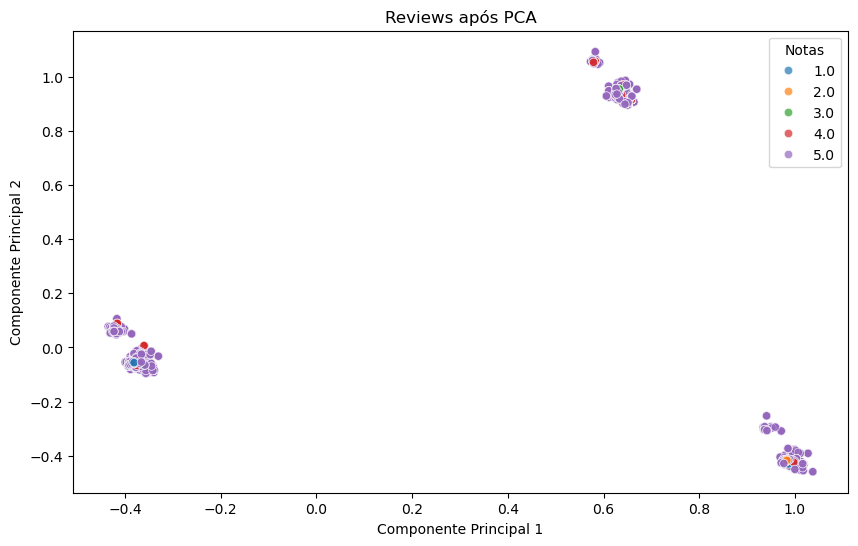

In [56]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cmmt_conc_pc, x='PC0', y='PC1', hue='Nota_Avaliação', palette='tab10', alpha=0.7)
plt.title('Reviews após PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Notas')
plt.show()


#### Resultado do PCA

Explicou porra nenhuma

In [57]:
Y.value_counts(normalize=True)

Nota_Avaliação
5.0    0.829488
4.0    0.077547
3.0    0.040888
1.0    0.032130
2.0    0.019947
Name: proportion, dtype: float64

#### Floresta Aleatoria

In [58]:
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.25, random_state=777)

In [59]:
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(x_train[['Gênero', 'Título']])
x_cat_train = encoder.transform(x_train[['Gênero', 'Título']]).toarray() 
x_cat_test = encoder.transform(x_test[['Gênero', 'Título']]).toarray()


stop_words = stopwords.words('portuguese')
vectorizer = TfidfVectorizer(stop_words=stop_words)
vectorizer.fit(x_train['Comentários'])
x_text_train = vectorizer.transform(x_train['Comentários'])
x_text_test = vectorizer.transform(x_test['Comentários'])


x_transformed_train = hstack([x_cat_train, x_text_train])
x_transformed_test = hstack([x_cat_test, x_text_test])

x_transformed_train =  x_transformed_train.toarray()
x_transformed_test = x_transformed_test.toarray()

binarizar a variavel resposta, caso precise

In [60]:
le = LabelEncoder()
Y_Encoded = le.fit_transform(Y)

In [61]:

Y_train_bin = label_binarize(Y_train, classes=[1.0, 2.0,3.0,4.0,5.0])
Y_test_bin = label_binarize(Y_test, classes=[1.0, 2.0,3.0,4.0,5.0])

Tuning de hiper-parametros

In [62]:
#param_grid = {
#    'estimator__n_estimators': [50,10,200],
#    'estimator__max_depth': [4,6,8,None],
#    'estimator__min_samples_split': [2,5,10],
#}
#
#
#base_rf = OneVsRestClassifier(RandomForestClassifier(random_state=777))
#
#
#grid_search = GridSearchCV(
#    estimator=base_rf,
#    param_grid=param_grid,
#    cv=5,
#    scoring=['roc_auc_ovr', 'f1_macro', 'accuracy'],
#    verbose=3,
#    n_jobs=1,
#    refit='f1_macro'
#)
#
#
#grid_search.fit(x_transformed_train, Y_train_bin)

In [ ]:
#print("Melhores hiperparâmetros encontrados:")
#print(grid_search.best_params_)
#
#melhor_modelo = grid_search.best_estimator_


Melhores hiperparâmetros encontrados:


NameError: name 'grid_search' is not defined

ou seja apenas rode 

```
OneVsRestClassifier(estimator=RandomForestClassifier(n_estimators=50, random_state=777))

```
Ao inves da função de hiper-tuning


In [64]:
melhor_rf = OneVsRestClassifier(estimator=RandomForestClassifier(n_estimators=50, random_state=777))

melhor_rf_fit = melhor_rf.fit(x_transformed_train, Y_train_bin)


In [ ]:
#melhor_modelo

NameError: name 'melhor_modelo' is not defined

In [65]:
melhor_rf_fit.estimators_

[RandomForestClassifier(n_estimators=50, random_state=777),
 RandomForestClassifier(n_estimators=50, random_state=777),
 RandomForestClassifier(n_estimators=50, random_state=777),
 RandomForestClassifier(n_estimators=50, random_state=777),
 RandomForestClassifier(n_estimators=50, random_state=777)]

In [66]:
le.classes_

array([1., 2., 3., 4., 5.])

In [67]:
y_pred_bin = melhor_rf_fit.predict(x_transformed_test)
y_pred = y_pred_bin.argmax(axis=1)

y_pred = le.inverse_transform(y_pred)

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       512
         2.0       1.00      1.00      1.00       319
         3.0       0.95      1.00      0.98       649
         4.0       0.98      0.94      0.96      1234
         5.0       1.00      1.00      1.00     13128

    accuracy                           0.99     15842
   macro avg       0.99      0.99      0.99     15842
weighted avg       0.99      0.99      0.99     15842



In [68]:
print(le.classes_)
print(np.unique(Y_test))
print(np.unique(y_pred))

[1. 2. 3. 4. 5.]
[1. 2. 3. 4. 5.]
[1. 2. 3. 4. 5.]


In [69]:
rf_model = melhor_rf_fit.estimators_[0]

In [70]:
feature_names = (
    vectorizer.get_feature_names_out().tolist()+
    encoder.get_feature_names_out(['Gênero', 'Título']).tolist()
)

In [71]:
feature_names

['03',
 '10',
 '100',
 '10kg',
 '11',
 '12kg',
 '13',
 '14',
 '15',
 '16',
 '16kg',
 '170',
 '18',
 '1kg',
 '1x',
 '20',
 '20kg',
 '2x',
 '30kg',
 '500',
 '500g',
 '5kg',
 '5meses',
 '60',
 '99',
 'aaama',
 'aaamaaa',
 'abastece',
 'abertos',
 'abertura',
 'abraço',
 'abri',
 'abria',
 'abrindo',
 'abrir',
 'abriu',
 'abro',
 'absurdo',
 'acaba',
 'acabar',
 'acabei',
 'acabou',
 'acalma',
 'acalmada',
 'acalmar',
 'acaso',
 'aceita',
 'aceitam',
 'aceitando',
 'aceitaram',
 'aceitação',
 'aceito',
 'aceitou',
 'aceitável',
 'acessível',
 'acha',
 'achamos',
 'achando',
 'achar',
 'acharam',
 'achei',
 'acho',
 'acontece',
 'acontecer',
 'aconteceu',
 'aconteça',
 'acordado',
 'acordo',
 'acostumada',
 'acostumado',
 'acostumados',
 'acostumar',
 'acostumaram',
 'acreditando',
 'acredito',
 'adaptaram',
 'adaptei',
 'adaptou',
 'adequada',
 'adequado',
 'aderiu',
 'adestrada',
 'adestramento',
 'adestrar',
 'aditivos',
 'admito',
 'adocicado',
 'adoooraa',
 'adora',
 'adoraaaa',
 'ador

/tmp/ipykernel_3584183/295991859.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')


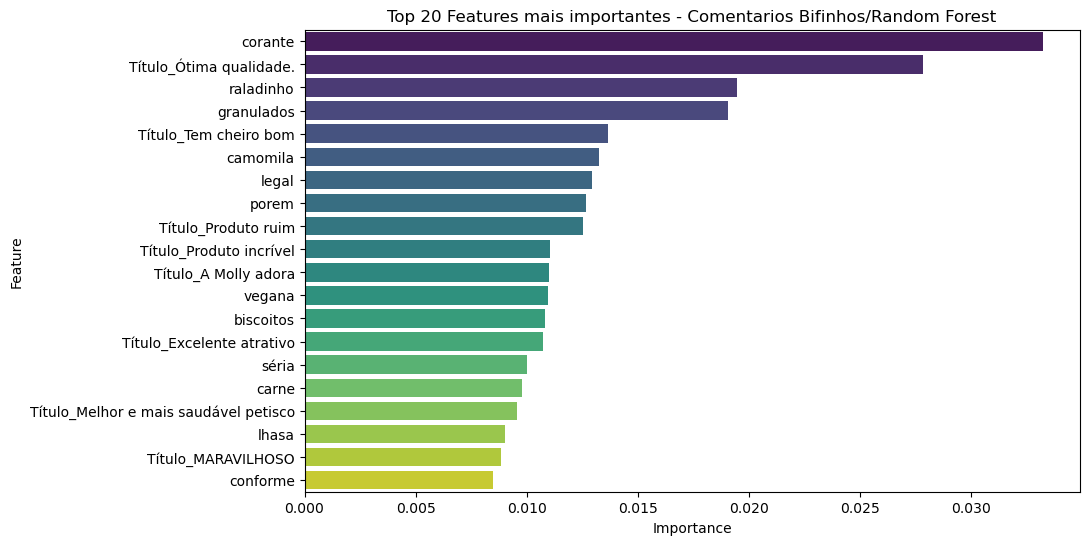

In [72]:

rf_model = melhor_rf_fit.estimators_[0]
importances = rf_model.feature_importances_
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False).head(20)


plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title('Top 20 Features mais importantes - Comentarios Bifinhos/Random Forest')
plt.show()

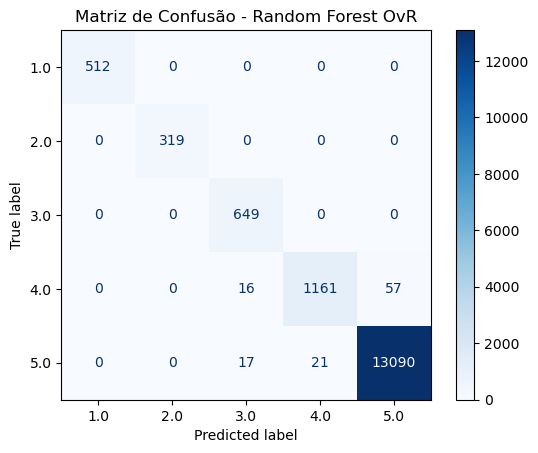

In [73]:

cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)

#plt.figure(figsize=(20, 10))
disp.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusão - Random Forest OvR')
plt.grid(False)
plt.show()


/tmp/ipykernel_3584183/273682251.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='mako')


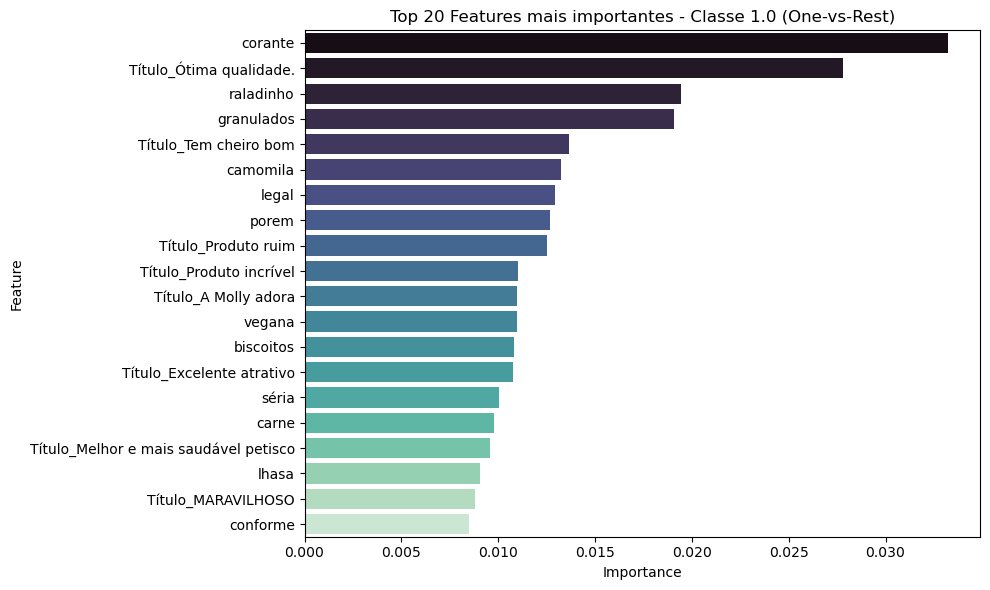

/tmp/ipykernel_3584183/273682251.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='mako')


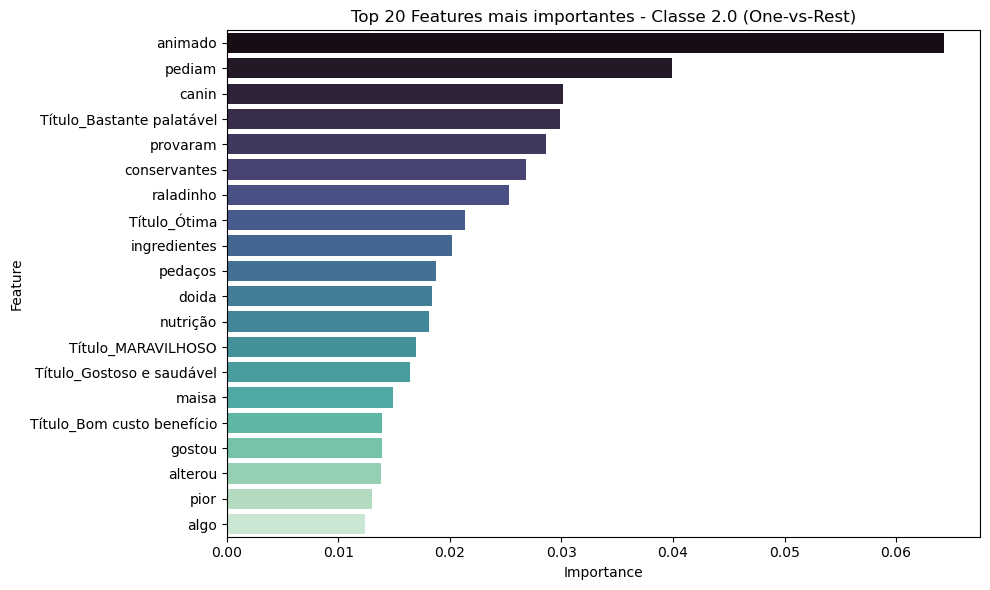

/tmp/ipykernel_3584183/273682251.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='mako')


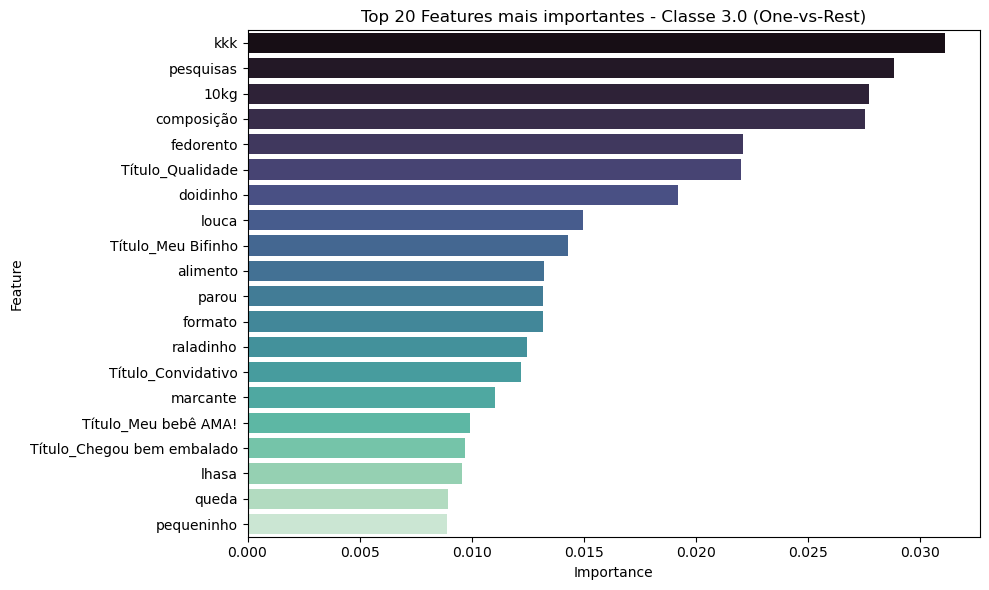

/tmp/ipykernel_3584183/273682251.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='mako')


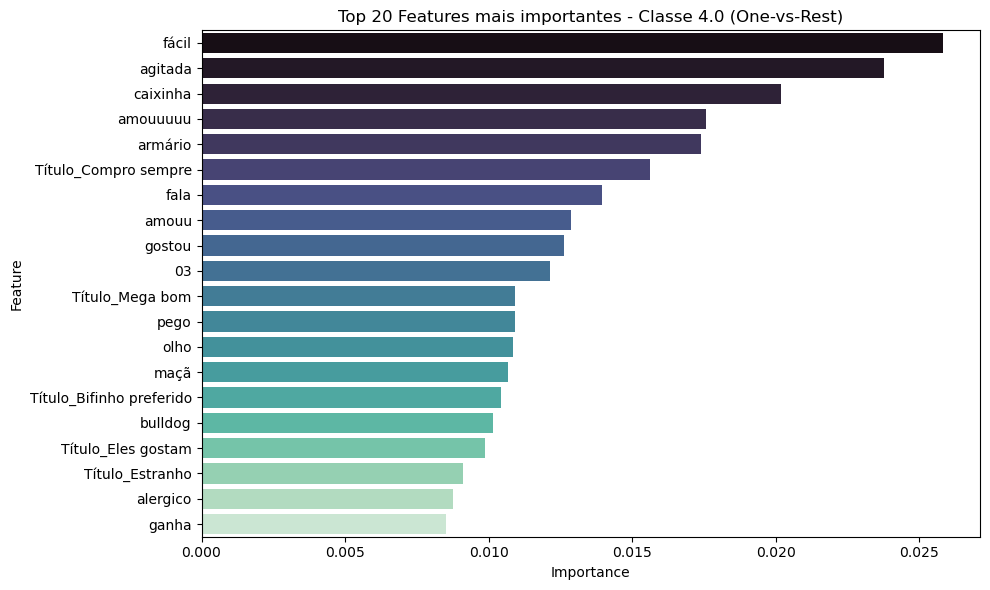

/tmp/ipykernel_3584183/273682251.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='mako')


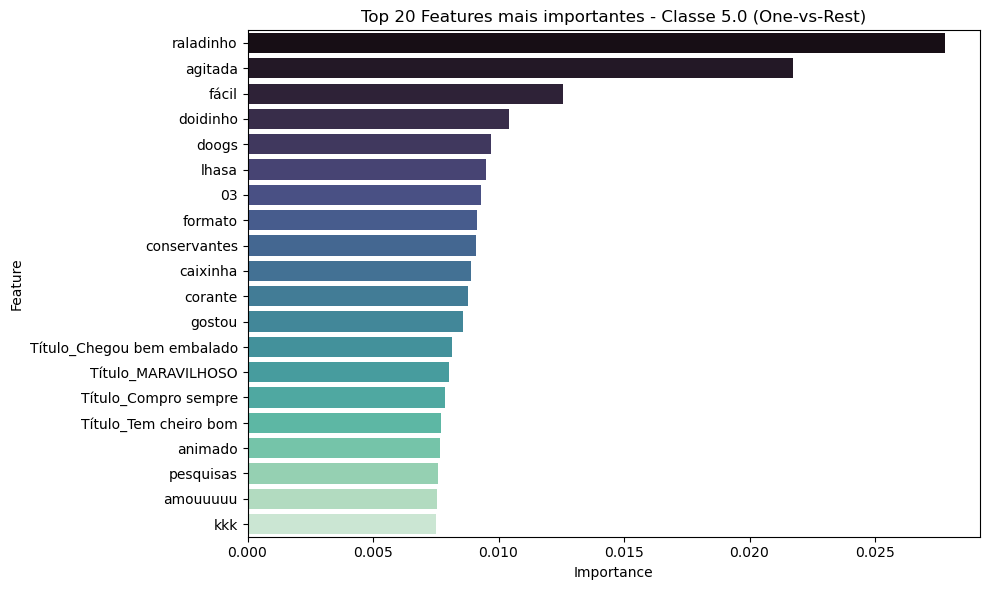

In [74]:
for i, clf in enumerate(melhor_rf_fit.estimators_):
    importances = clf.feature_importances_
    feat_imp_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False).head(20)

    # Obtém a classe original (1.0 a 5.0) usando LabelEncoder
    classe_codificada = melhor_rf_fit.classes_[i]
    classe_original = le.inverse_transform([classe_codificada])[0]

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='mako')
    plt.title(f'Top 20 Features mais importantes - Classe {classe_original} (One-vs-Rest)')
    plt.tight_layout()
    plt.show()



In [75]:
df_cmmt_conc_pc[df_cmmt_conc_pc['Nota_Avaliação'] == 1.0]['Título']

52                         Ninguém gostou
53                         Ninguém gostou
64       Meu pet não gostou nem um pouco.
65       Meu pet não gostou nem um pouco.
96                           Produto ruim
                       ...               
63113                          Muito ruim
63178                             Petisco
63179                             Petisco
63364             Não compraria novamente
63365             Não compraria novamente
Name: Título, Length: 2036, dtype: object

In [76]:
df_cmmt_conc_pc['Nome_Produto'].unique()

array(['Bifinho Maskoto para Cães Sabor Frango e Cenoura',
       'Bifinho Maskoto para Cães Sabor Alecrim e Batata Doce',
       'Bifinho Maskoto para Cães Sabor Açaí com Banana',
       'Bifinho PetVegan para Cães Sabor Camomila e Maracujá',
       'Bifinho Nutrilus Mini Stick para Cães Adultos Sabor Carne',
       'Petisco XisDog para Cães Filhotes Sabor Leite - 55g',
       'Bifinho PetVegan para Cães Sabor Mamão, laranja e coco',
       'Bifinho PetVegan para Cães Sabor Beterraba e Cenoura',
       'Bifinho Spin Pet Symbioplex Imuno Mini para Cães',
       'Petisco XisDog para Cães Sabor Carne - 250g',
       'Petisco XisDog para Cães Sabor Carne - 350g',
       'Petisco XisDog para Cães Sabor Frango - 350g',
       'Bifinho Nutrilus para Cães Adultos Sabor Frango',
       'Bifinho Baw Waw para Cães Adultos Porte Pequeno Sabor Carne',
       'Bifinho Nutrilus Mini para Cães Adultos Sabor Carne',
       'Bifinho Baw Waw para Cães Adultos Porte Grande Sabor Carne',
       'Petisco X

5.0


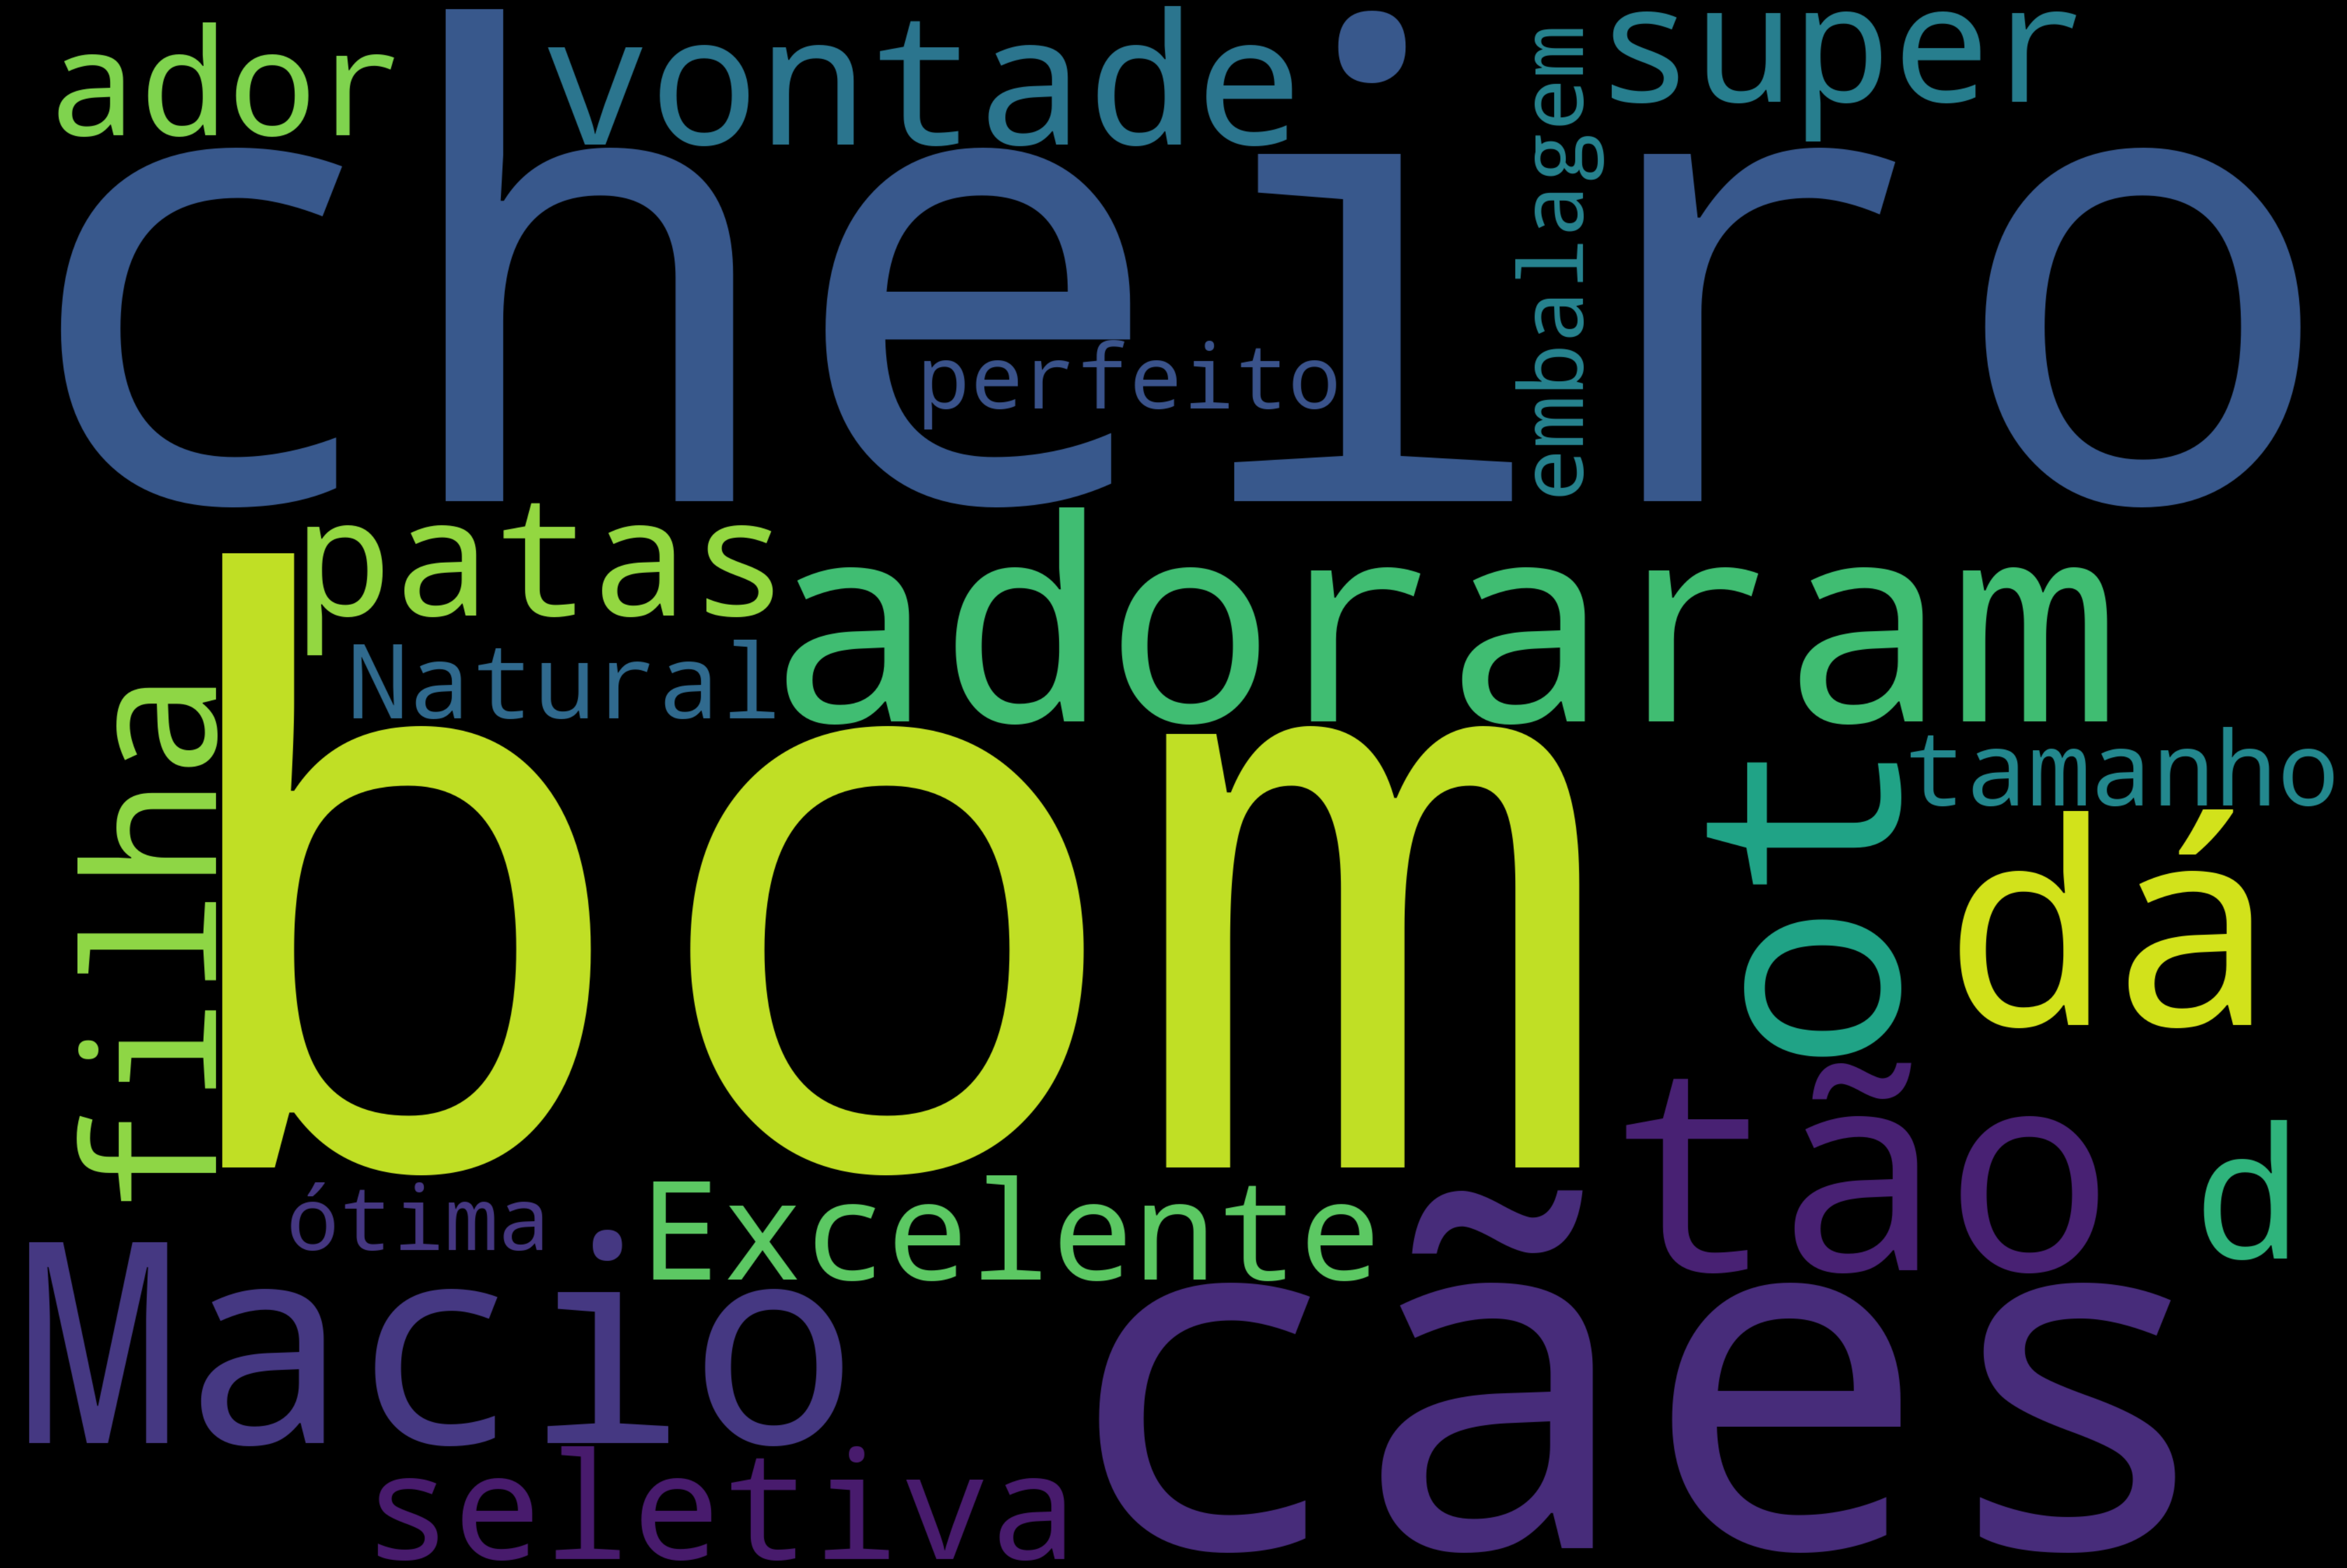

2.0


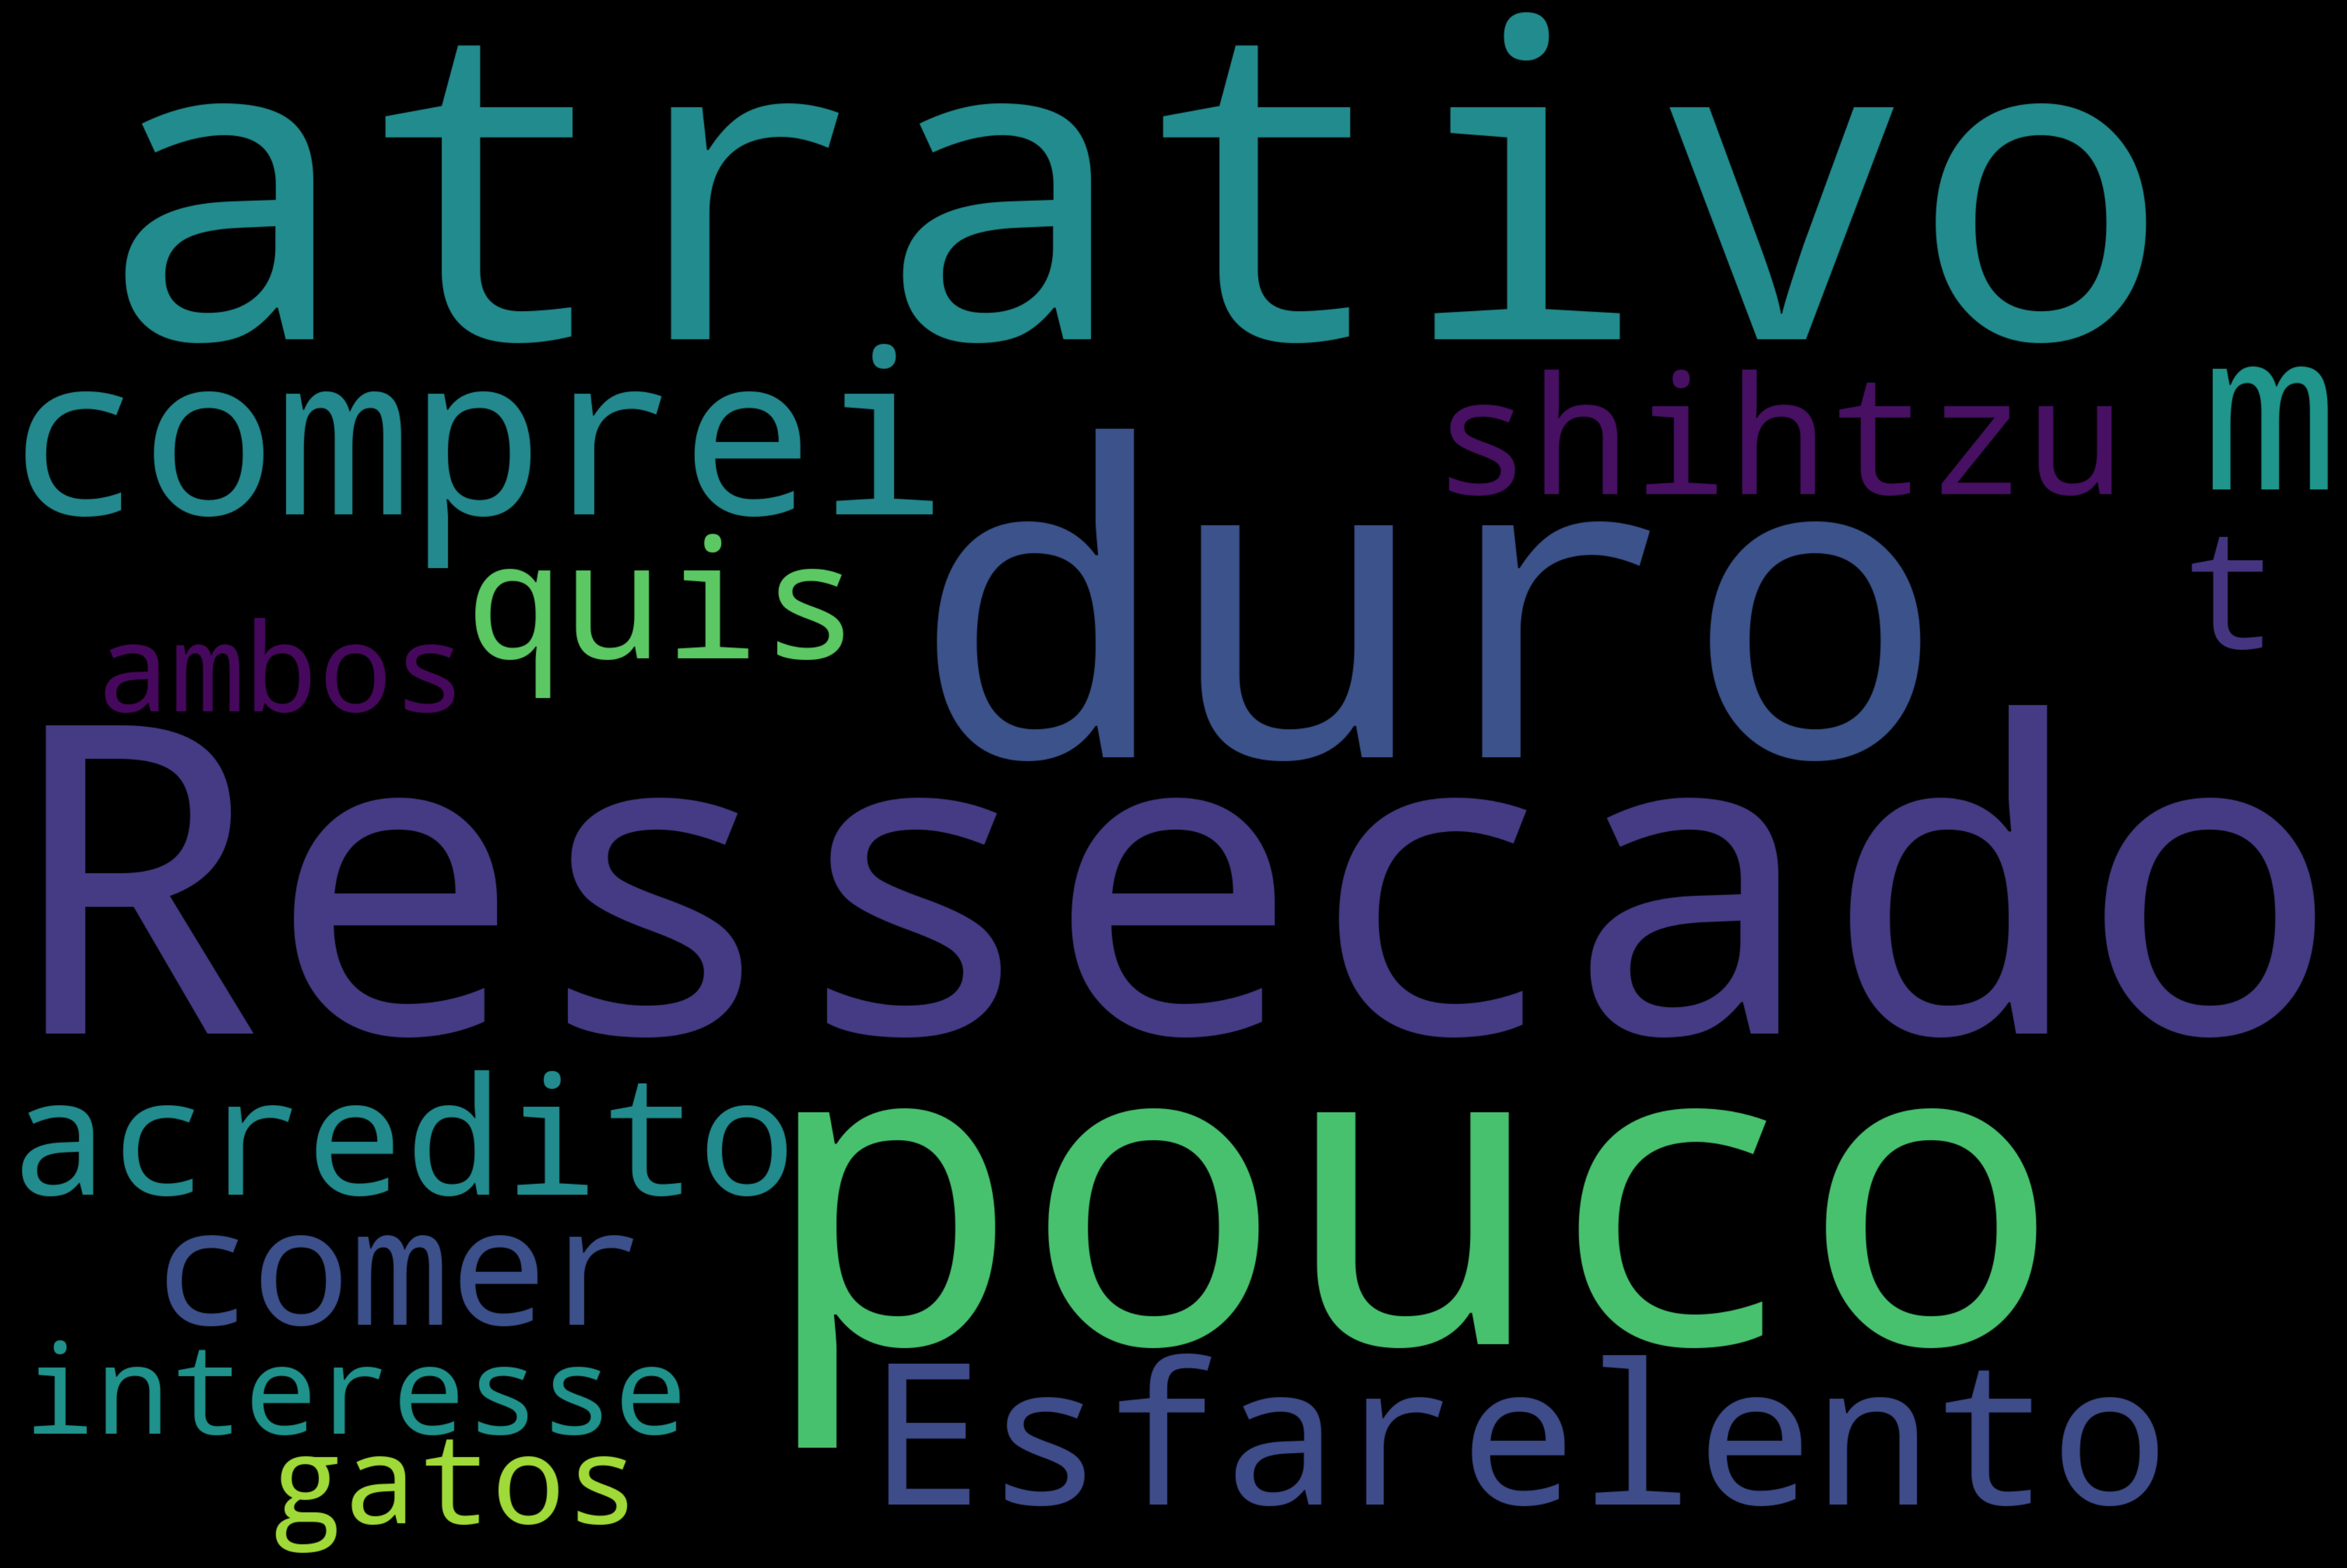

4.0


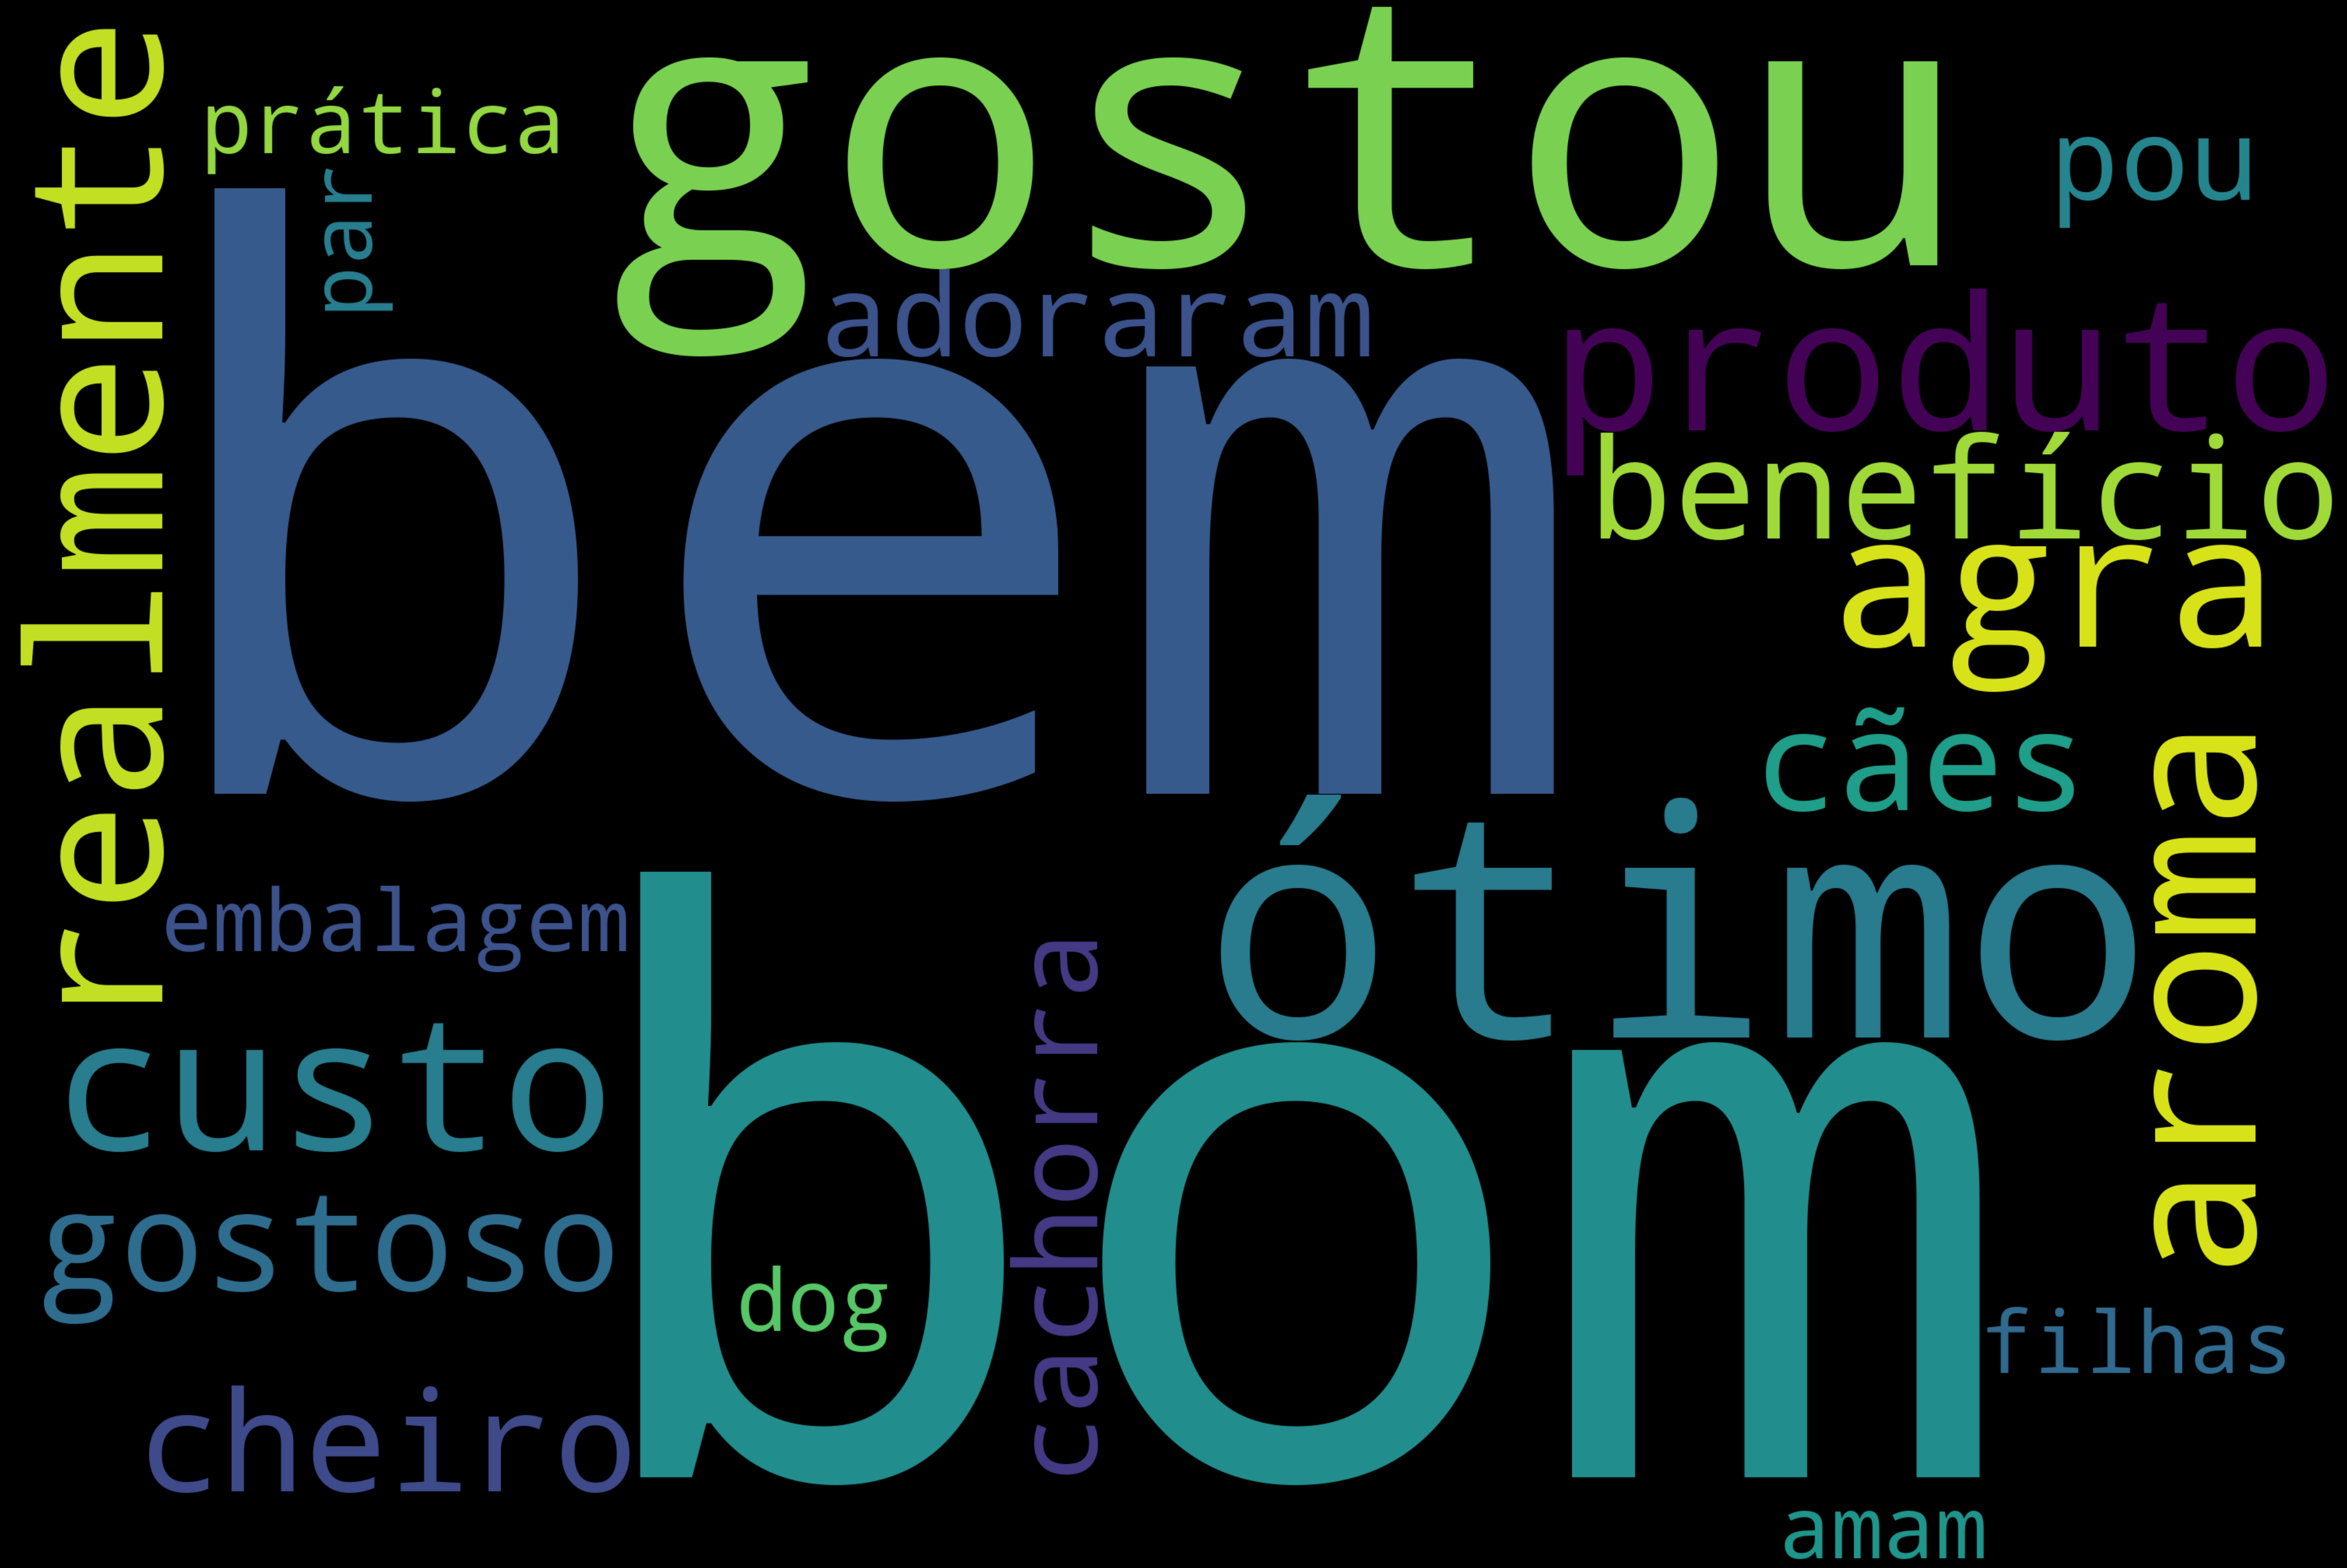

1.0


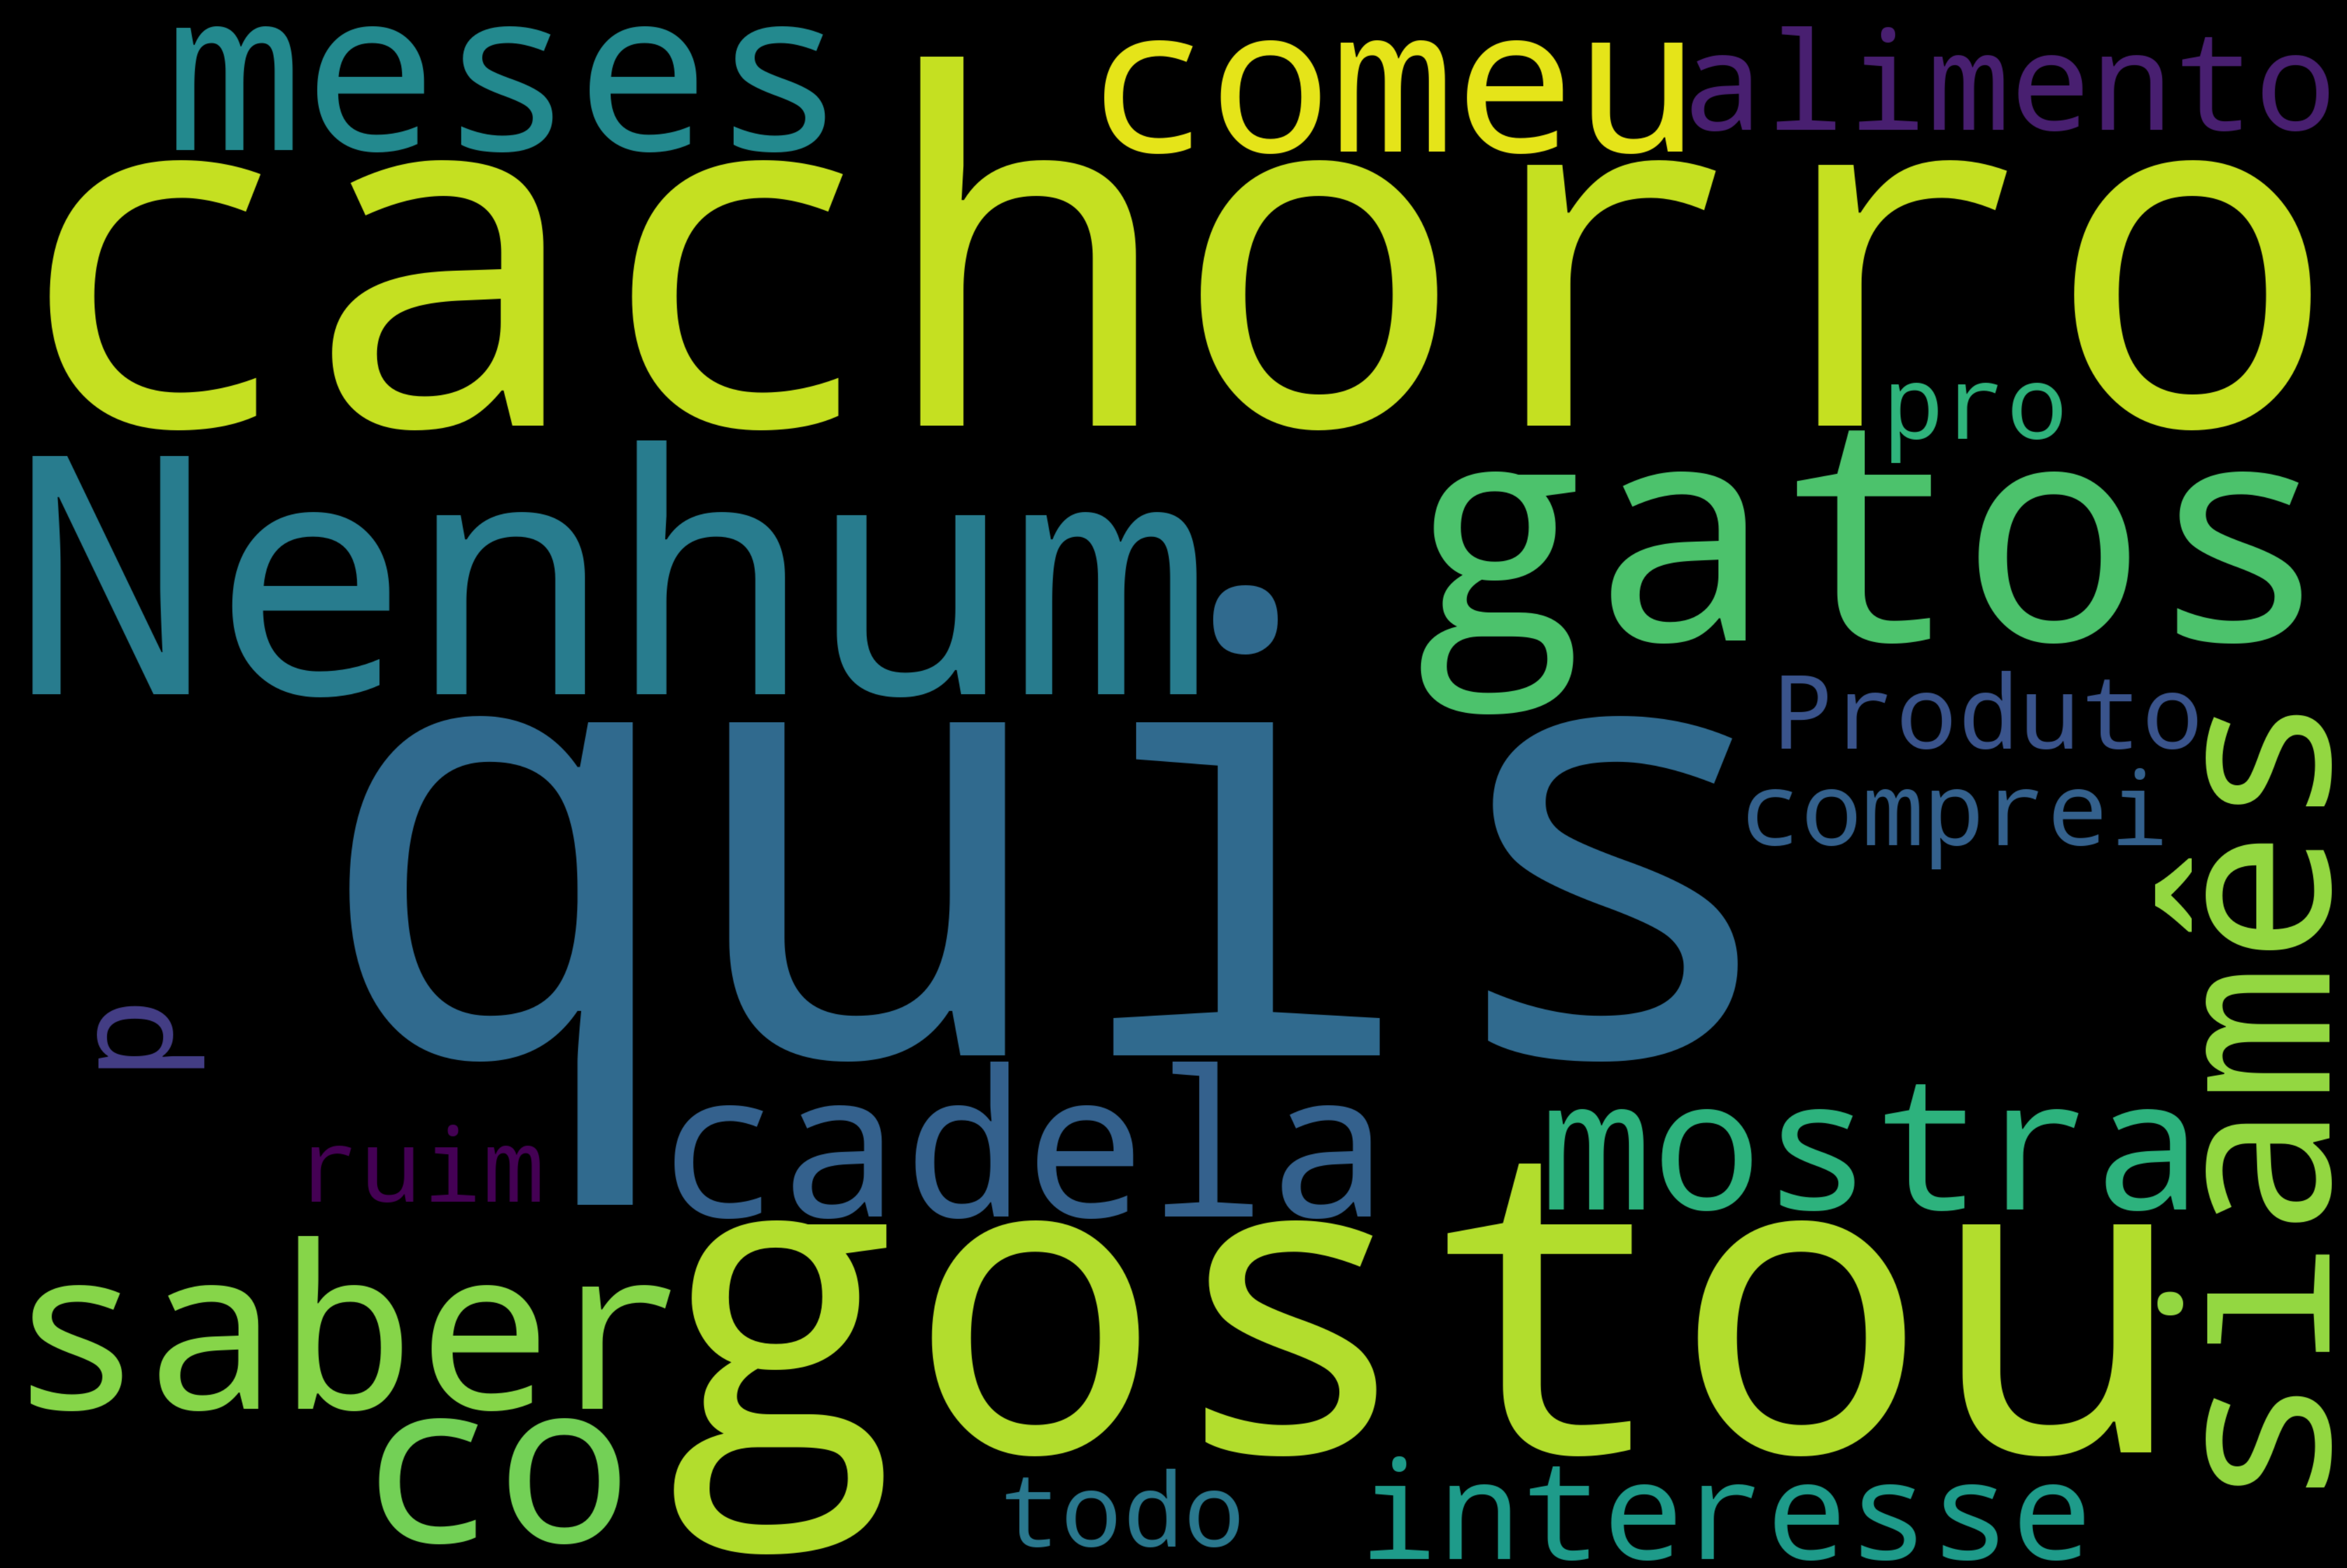

3.0


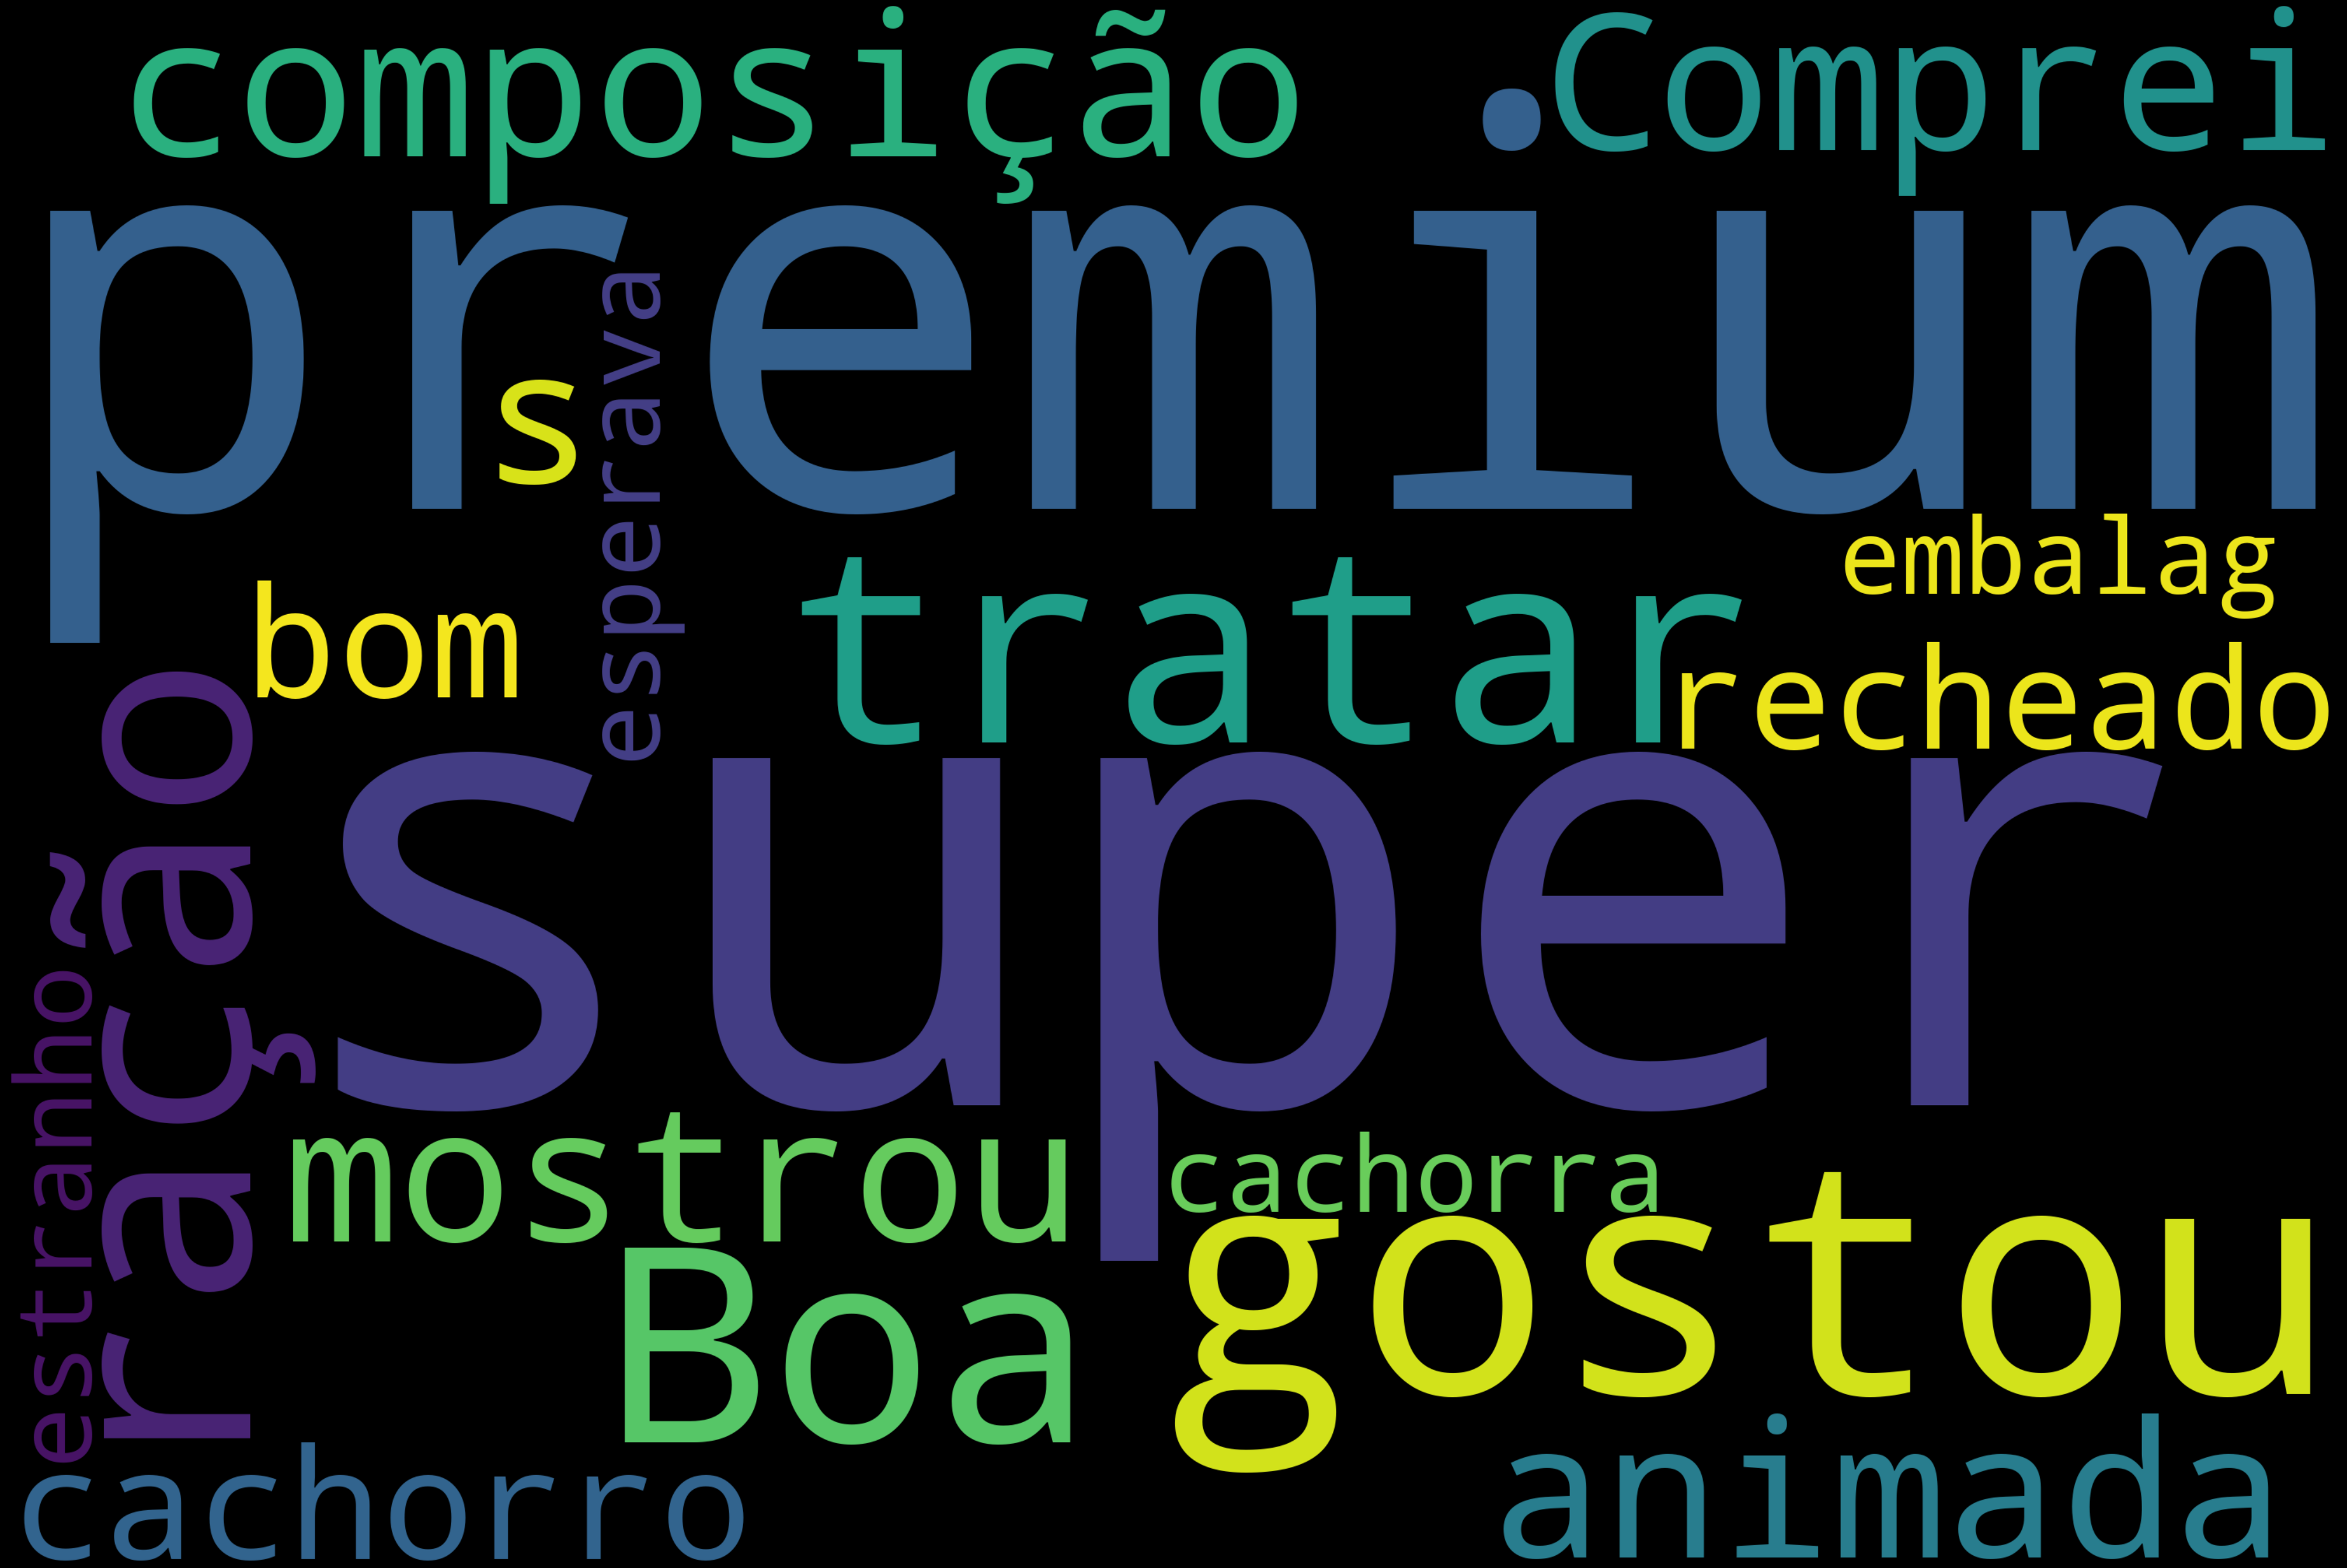

In [77]:
stopwords = stop_words 


other_words = ['/n', 'Ja', 'dtype', 'Name', 'int', 'Otto', 'gato', 'gata', 'object', 'Comentários', 'Length', 'muita', 'muito']

for word in other_words:
    stopwords.append(word)

for nota in df_cmmt_conc['Nota_Avaliação'].unique():
    comment_nota = df_cmmt_conc[df_cmmt_conc['Nota_Avaliação'] ==  nota]['Comentários']

    print(f'{nota}')

    text = comment_nota

    wordcloud = WordCloud(
        width = 3000,
        height= 2000,
        background_color= 'black',
        stopwords= stopwords).generate(str(text))
    fig = plt.figure(
        figsize= (40,30),
        facecolor = 'k',
        edgecolor = 'k')    
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()


Por performance, use 50 estimadores e menos samples, mas os melhores modelos não tem restrição de profunidade da arvore

#### À Fazer
    - Rodar RNN para ter um modelo mais explicativo e reduzir o overfitting
    - Tentar o XGBoost tb